# Imports

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import csv
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import LabelEncoder

# Importing and splitting dataset

In [56]:
file = pd.read_csv("audi.csv", quotechar='"', skipinitialspace=True)

modelEncoder = LabelEncoder()
modelEncoder.fit(file["model"])
file["model"] = modelEncoder.transform(file["model"])

transmissionEncoder = LabelEncoder()
transmissionEncoder.fit(file["transmission"])
file["transmission"] = transmissionEncoder.transform(file["transmission"])

fuelTypeEncoder = LabelEncoder()
fuelTypeEncoder.fit(file["fuelType"])
file["fuelType"] = fuelTypeEncoder.transform(file["fuelType"])

file = file.head(1000)

# X = file.drop(['price', 'model', 'transmission', 'fuelType'], axis = 1)
X = file.drop(columns = ['price'])
Y = file.price

print(file)

     model  year  price  transmission  mileage  fuelType  tax   mpg  \
0        0  2017  12500             1    15735         2  150  55.4   
1        5  2016  16500             0    36203         0   20  64.2   
2        0  2016  11000             1    29946         2   30  55.4   
3        3  2017  16800             0    25952         0  145  67.3   
4        2  2019  17300             1     1998         2  145  49.6   
..     ...   ...    ...           ...      ...       ...  ...   ...   
995      2  2017  14995             1    14488         2  150  60.1   
996      8  2019  22995             2     3049         2  150  43.5   
997      5  2019  45995             2     7461         0  150  37.7   
998     10  2017  33495             2    37492         2  150  34.0   
999      4  2018  19495             2    36715         2  150  35.3   

     engineSize  
0           1.4  
1           2.0  
2           1.4  
3           2.0  
4           1.0  
..          ...  
995         1.4  
996

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 601)

# Normalizing Data

In [58]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# KNN using Scikit-Learn

In [59]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
knn = KNN_Reg(n_neighbors = 4)
knn.fit(X_train, Y_train)
print(knn.score(X_test, Y_test))

0.8905304474015207


Text(0, 0.5, 'R^2')

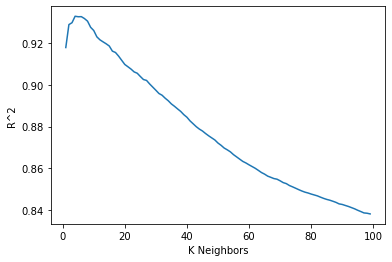

In [40]:
results = np.empty(99)
for k in range(1, 100):
    knn = KNN_Reg(n_neighbors = k)
    knn.fit(X_train, Y_train)
    results[k - 1] = (knn.score(X_test, Y_test))

plt.plot(np.arange(99) + 1, results)
plt.xlabel('K Neighbors')
plt.ylabel('R^2')

# Euclidean Distance

In [94]:
def eucDistance(variable1, variable2):
    distance = 0
    for i in range(len(variable2)):
        distance += (variable1[i] - variable2[i])**2
    return np.sqrt(distance)

# KNN

In [91]:
def kNN(train, testRow, yTrain, num):
    distance = list() #Stores distance of each point
    for i in range(len(train)): #REMOVED -1 from here!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        dist = eucDistance(train[i], testRow) #sends points to work out distance
        distance.append((train[i], dist, yTrain.iloc[i])) 
    distance = sort(distance) #need to create a sort method to order list
#     print("DISTANCE: ", distance)
    kNeighbours = list() #list to store K amount of neighbour results
    for i in range(num):
        kNeighbours.append((testRow, distance[i][1], distance[i][2]))
    return kNeighbours 

# Sort Method

In [9]:
def sort(dist):
    for i in range(0, len(dist)):
        for j in range(0, len(dist) - i - 1):
            if (dist[j][1] > dist[j + 1][1]):
                temp = dist[j]
                dist[j] = dist[j + 1]
                dist[j + 1] = temp
    return dist

# Predict Method

In [87]:
from statistics import mean 

def predict(train, test, yTrain, num_neighbors):
    predictions = list()
    for i in range(len(test)):
        neighbour = kNN(train, test[i], yTrain, num_neighbors)
        labels = [] #Stores yTrain for each test variable
        for i in range (len(neighbour)):
            t = labels.append(neighbour[i][2]) #Appends yTrain
        predictions.append(mean(labels))
    return predictions

# RMSE

In [12]:
def rmse(test, pred):
    MSE = np.square(np.subtract(test, pred)).mean()
    return sqrt(MSE)

# Evaluation Method

In [96]:
def eva(train, test, yTrain, yTest):
    rmseValues = []
    predictions = []
    for k in range(1, 101): #Testing up to 100 neearest neighbours
        y_pred = predict(train, test, yTrain, k)
        error = rmse(yTest, y_pred) 
        rmseValues.append(error)
        print('RMSE value for k =' , k , 'is:', error)

    plt.plot(np.arange(100) + 1, rmseValues)
    plt.xlabel('K Neighbors')
    plt.ylabel('RMSE')
    
    return

RMSE value for k = 1 is: 4391.975156122812
RMSE value for k = 2 is: 3734.0649244489578
RMSE value for k = 3 is: 3591.0428997715967
RMSE value for k = 4 is: 3447.6766234668817
RMSE value for k = 5 is: 3479.351156753224
RMSE value for k = 6 is: 3678.6870456726815
RMSE value for k = 7 is: 3767.4391748241937
RMSE value for k = 8 is: 3856.806247142835
RMSE value for k = 9 is: 3960.747415829492
RMSE value for k = 10 is: 4008.5455013009396
RMSE value for k = 11 is: 4085.716471807607
RMSE value for k = 12 is: 4107.388667754733
RMSE value for k = 13 is: 4095.9583332841657
RMSE value for k = 14 is: 4149.725355731389
RMSE value for k = 15 is: 4232.8845228756245
RMSE value for k = 16 is: 4262.53736499752
RMSE value for k = 17 is: 4281.895224780727
RMSE value for k = 18 is: 4329.248082057668
RMSE value for k = 19 is: 4379.941800069951
RMSE value for k = 20 is: 4396.815201938785
RMSE value for k = 21 is: 4437.983226196332
RMSE value for k = 22 is: 4469.349302079666
RMSE value for k = 23 is: 4536.012

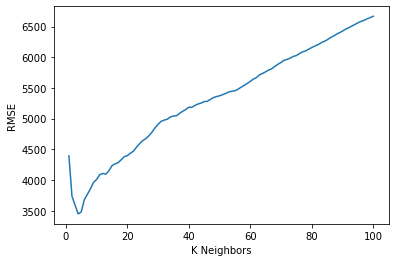

In [98]:
eva(X_train, X_test, Y_train, Y_test)

# 1NN

In [97]:
def NN(train, test, yTrain, yTest):    
    y_pred = predict(train, test, yTrain, 4)
    error = rmse(yTest, y_pred) 
    print('RMSE value for k =' , 4 , 'is:', error)
    for i in range(len(y_pred)):
        print("\nOriginal value:", yTest.iloc[i], "vs the predicted value:", y_pred[i])
        print("The difference is:", yTest.iloc[i] - y_pred[i])
    
    ### Below is attempt to put data on bar chart
#     YTest = pd.DataFrame(yTest)
# #     y_pred = pd.DataFrame(y_pred)
# #     y_pred = pd.DataFrame({'Price_prediction': y_pred.flatten()})
# #     Comparison = yTest.join(y_pred)
#     plt.bar(yTest, y_pred)
# #     plt.grid(linestyle = '-', linewidth = '0.6', color = 'green', which = 'both')
#     plt.show()
    return 
NN(X_train, X_test, Y_train, Y_test)

RMSE value for k = 4 is: 3447.6766234668817

Original value: 18498 vs the predicted value: 17370
The difference is: 1128

Original value: 22995 vs the predicted value: 22546
The difference is: 449

Original value: 12495 vs the predicted value: 15170
The difference is: -2675

Original value: 14500 vs the predicted value: 14370
The difference is: 130

Original value: 24995 vs the predicted value: 25618
The difference is: -623

Original value: 10200 vs the predicted value: 11275
The difference is: -1075

Original value: 21995 vs the predicted value: 19542
The difference is: 2453

Original value: 16800 vs the predicted value: 17785
The difference is: -985

Original value: 12798 vs the predicted value: 16346
The difference is: -3548

Original value: 20498 vs the predicted value: 23744
The difference is: -3246

Original value: 11498 vs the predicted value: 14368
The difference is: -2870

Original value: 48136 vs the predicted value: 51347
The difference is: -3211

Original value: 32485 vs th

# User Input Predictions

In [103]:
inputPred = []
entries = []

# print(list(modelEncoder.classes_))
inputPred.append((modelEncoder.transform([input("What Model is your car? ")]))[0])
inputPred.append(int(input("What year is your car? ")))
inputPred.append((transmissionEncoder.transform([input("What transmission is your car? ")]))[0])
inputPred.append(int(input("How much mileage does your car have? ")))
inputPred.append((fuelTypeEncoder.transform([input("What's your car fuel type? ")]))[0])
inputPred.append(int(input("How much is your cars tax? ")))
inputPred.append(float(input("What's MPG of your car? ")))
inputPred.append(float(input("What the engine size of your car? ")))
entries.append(inputPred)
inputPred = scaler.transform([inputPred])

import time
print("\n ***Predicting***")
start = time.time()
y_pred = predict(X_train, inputPred, Y_train, 4)
# {0:.2f}'.format()
print("\n Predicted price for your car is: £", y_pred[0])

print("\n ***Predicted in", time.time() - start,"seconds***")
# RS6,2016,44985,Semi-Auto,49050,Petrol,325,29.4,4.0

What Model is your car? RS6
What year is your car? 2016
What transmission is your car? Semi-Auto
How much mileage does your car have? 49050
What's your car fuel type? Petrol
How much is your cars tax? 325
What's MPG of your car? 29.4
What the engine size of your car? 4

 ***Predicting***

 Predicted price for your car is: £ 44717

 ***Predicted in 0.0937948226928711 seconds***


C:\Users\rb22\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [102]:
testy = 44985
pred = 44717
print(rmse(testy, pred))

268.0


# Scikit-Learn User Input Predictions

In [17]:
knn.predict(inputPred)

array([28213.88888889])